### Рис. 13

In [ ]:
def count_dates_all(col, df_new='df_new'):
    dff1 = spark.sql(f'''
    with t as
        (
        select 
            year_r
            , city
            , {col}
            , count(*) cnt
        from {df_new}
        group by
            year_r
            , city
            , {col}
        order by
            year_r
            , city
            , {col}
        )
    ,gr as
        (
        select
            {col} 
            ,max(case when city = 'Астана'  then cnt end) cnt_a
            ,max(case when city = 'Бишкек'  then cnt end) cnt_b
            ,max(case when city = 'Москва'  then cnt end) cnt_m
            ,max(case when city = 'ОАЭ'     then cnt end) cnt_o
            ,max(case when city = 'Ташкент' then cnt end) cnt_t
            ,max(case when city = 'СПБ'  then cnt end) cnt_s
            ,max(case when city = 'Новосибирск'  then cnt end) cnt_n
            ,max(case when city = 'Владивосток'  then cnt end) cnt_v
            ,max(case when city = 'Алматы'     then cnt end) cnt_all
            ,max(case when city = 'Калининград' then cnt end) cnt_k
        from t
        group by
            {col}
        order by
            {col}    
        )

    select
        {col}
        ,sum(cnt_a) over(partition by {col}) / sum(cnt_a) over()*100 cnt_a
        ,sum(cnt_b) over(partition by {col}) / sum(cnt_b) over()*100 cnt_b
        ,sum(cnt_m) over(partition by {col}) / sum(cnt_m) over()*100 cnt_m
        ,sum(cnt_o) over(partition by {col}) / sum(cnt_o) over()*100 cnt_o
        ,sum(cnt_t) over(partition by {col}) / sum(cnt_t) over()*100 cnt_t
        
        ,sum(cnt_s) over(partition by {col}) / sum(cnt_s) over()*100 cnt_s
        ,sum(cnt_n) over(partition by {col}) / sum(cnt_n) over()*100 cnt_n
        ,sum(cnt_v) over(partition by {col}) / sum(cnt_v) over()*100 cnt_v
        ,sum(cnt_all) over(partition by {col}) / sum(cnt_all) over()*100 cnt_all
        ,sum(cnt_k) over(partition by {col}) / sum(cnt_k) over()*100 cnt_k
    from gr

    ''').toPandas()
    return dff1

### Рис. 14

In [ ]:
def make_linear_plots(input_filename, cnt=9999, size_x=17.5, size_y=10.8, font_size=16, img_w=16.5, img_h=10, blank=True, word_sample='files/report.docx'):
    cols1 = ['Час','Количество запросов Астана','Количество запросов Бишкек','Количество запросов Москва','Количество запросов ОАЭ','Количество запросов Ташкент']
    cols2 = ['Дата','Количество запросов Астана','Количество запросов Бишкек','Количество запросов Москва','Количество запросов ОАЭ','Количество запросов Ташкент']
    cols3 = ['Неделя','Количество запросов Астана','Количество запросов Бишкек','Количество запросов Москва','Количество запросов ОАЭ','Количество запросов Ташкент']
    cols4 = ['День недели','Количество запросов Астана','Количество запросов Бишкек','Количество запросов Москва','Количество запросов ОАЭ','Количество запросов Ташкент']

    dff1 = pd.read_excel(input_filename, sheet_name='Часы')[cols1]
    dff2 = pd.read_excel(input_filename, sheet_name='Даты')[cols2]
    dff3 = pd.read_excel(input_filename, sheet_name='Недели')[cols3]
    dff4 = pd.read_excel(input_filename, sheet_name='Дни недели')[cols4]
    
    dff1_test = dff1.set_index(dff1.columns[0])
    dff2_test = dff2.set_index(dff2.columns[0])
    dff3_test = dff3.set_index(dff3.columns[0])
    dff4_test = dff4.set_index(dff4.columns[0])
    dff4_test.index = (['пн','вт','ср','чт','пт','сб','вс'])
    j=0
    for d in [dff1_test, dff2_test, dff3_test, dff4_test]: 
        j+=1
        fig, ax = plt.subplots()
        ax = sns.lineplot(data = d, linewidth=3, palette=['#4F81BD', '#F79646', '#C0504D', '#9BBB59', '#264478'])
        plt.legend(['Астана', 'Бишкек', 'Москва', 'ОАЭ', 'Ташкент'], prop=fpath)
        plt.xticks(font=fpath)
        plt.yticks(font=fpath)
        plt.grid(visible=True, linewidth=0.3)
        ax.set_xlabel('')
        ax.yaxis.set_major_formatter(FuncFormatter(zero))
        ax.xaxis.set_major_locator(ticker.MultipleLocator(1)) 
        ax.yaxis.set_major_locator(ticker.LinearLocator(numticks=6))  
        if 'Час' == d.index.name:
            ax.xaxis.set_major_formatter(FuncFormatter(xaxis_f))
            ax.set_title(f'Запросы по часам, шт.', font=fpath)
        elif 'Дата' == d.index.name:
            ax.xaxis.set_major_locator(ticker.MultipleLocator(4)) 
            ax.set_title(f'Запросы по датам, шт.', font=fpath)
        elif 'Неделя' == d.index.name:
            ax.set_title(f'Запросы по неделям, шт.', font=fpath)
        else:
            ax.set_title(f'Запросы по дням недели, шт.', font=fpath) 

        im = plt.imread(r"C:\Users\Mamed\YandexDisk\_Documents\Проекты\2ГИС 2023\Лого\01_Logo_HSE_full_rus_PANTONE_for_dark_2.png")
        ax.figure.figimage(im, 200, 1950, zorder=1, alpha=1)


        ax.figure.savefig(img_file_name_final, bbox_inches='tight')
        add_image(word_file, img_file_name_final, '', img_w=img_w, img_h=img_h, blank=True,word_sample=word_sample)
        #plt.show()
        plt.close()

### Рис. 15

In [19]:
df_new_list = []
for i in tqdm(['hour_r','date_r','week_r','week_day_r']):
    df_new_list.append(count_dates_all(i))

100%|███████████████████████████████████████████████████████████████████████████████████| 4/4 [09:50<00:00, 147.70s/it]


In [21]:
dff1 = df_new_list[0]
dff2 = df_new_list[1]
dff3 = df_new_list[2]
dff4 = df_new_list[3]

In [23]:
with pd.ExcelWriter(f'files/df_dates_new.xlsx') as writer:
    dff1.to_excel(writer, sheet_name='Часы', index=False)
    dff2.to_excel(writer, sheet_name='Даты', index=False)
    dff3.to_excel(writer, sheet_name='Недели', index=False)
    dff4.to_excel(writer, sheet_name='Дни недели', index=False)

In [24]:
pd.read_excel(f'files/df_dates_new.xlsx', sheet_name='Часы')

Час  Количество запросов Астана  Количество запросов Бишкек  \
0     0                    2.264229                    2.031832   
1     1                    1.582621                    1.388003   
2     2                    1.033876                    0.897854   
3     3                    0.650966                    0.607679   
4     4                    0.431003                    0.431487   
5     5                    0.350761                    0.365190   
6     6                    0.619536                    0.546404   
7     7                    1.662151                    1.403216   
8     8                    2.697636                    2.566064   
9     9                    3.743899                    4.015244   
10   10                    4.831610                    5.126515   
11   11                    5.870890                    6.277339   
12   12                    6.690722                    7.032063   
13   13                    7.076480                    7.395109   
14   14                    7.473568                    7.794505   
15   15                    7.513544                    7.750331   
16   16                    7.433307                    7.531648   
17   17                    7.316258                    7.312675   
18   18                    7.206226                    7.052128   
19   19                    6.474189                    6.239395   
20   20                    5.506222                    5.274687   
21   21                    4.712970                    4.475169   
22   22                    3.834848                    3.694204   
23   23                    3.022490                    2.791260   

    Количество запросов Москва  Количество запросов ОАЭ  \
0                     1.899841                 2.424764   
1                     1.173393                 1.559207   
2                     0.698574                 0.987464   
3                     0.471974                 0.650282   
4                     0.398168                 0.478211   
5                     0.482967                 0.452889   
6                     0.843651                 0.630629   
7                     1.659073                 1.216226   
8                     2.952298                 2.276318   
9                     4.278649                 3.584283   
10                    5.383985                 4.695005   
11                    6.340741                 5.426292   
12                    7.066764                 6.480089   
13                    7.516881                 7.082437   
14                    7.679983                 7.155664   
15                    7.620540                 6.723563   
16                    7.434071                 6.277721   
17                    7.205358                 6.082257   
18                    6.922120                 6.242949   
19                    6.112164                 6.995533   
20                    5.090043                 7.224968   
21                    4.346009                 6.482083   
22                    3.644471                 5.162824   
23                    2.778280                 3.708342   

    Количество запросов Ташкент  Количество запросов СПБ  \
0                      1.685507                 2.200281   
1                      1.119650                 1.369633   
2                      0.699642                 0.861704   
3                      0.446218                 0.567135   
4                      0.334403                 0.441276   
5                      0.357915                 0.457358   
6                      1.224334                 0.714197   
7                      3.490345                 1.426723   
8                      4.522502                 2.598937   
9                      4.708513                 3.796749   
10                     5.163750                 4.801644   
11                     6.086944                 5.760871   
12                     6.903064                 6.621723   
13          

### Рис. 16

In [37]:
def add_image(docx_name, image_name, img_w=17.5, img_h=10.8, word_sample='files/report.docx'):
    try:
        doc = docx.Document(docx_name)
    except:
        doc = docx.Document(word_sample)
        doc.save(docx_name)
    image_to_add = doc.add_picture(image_name)
    image_to_add.width = Cm(img_w)
    image_to_add.height = Cm(img_h)
    doc.save(docx_name)

In [38]:
df_tx_grouped_filtered = spark.read.parquet(f"files/df_tx_grouped_filtered_ten_city")
df_tx_grouped_filtered.createOrReplaceTempView('df_tx_grouped_filtered')
rubrics = spark.sql('''select distinct rubricName from df_tx_grouped_filtered''').collect()
rubrics = [i.asDict()['rubricName'] for i in rubrics]
rubrics = pd.DataFrame(rubrics)
rubrics['Рейтинг рубрики'] = rubrics.index + 1

  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

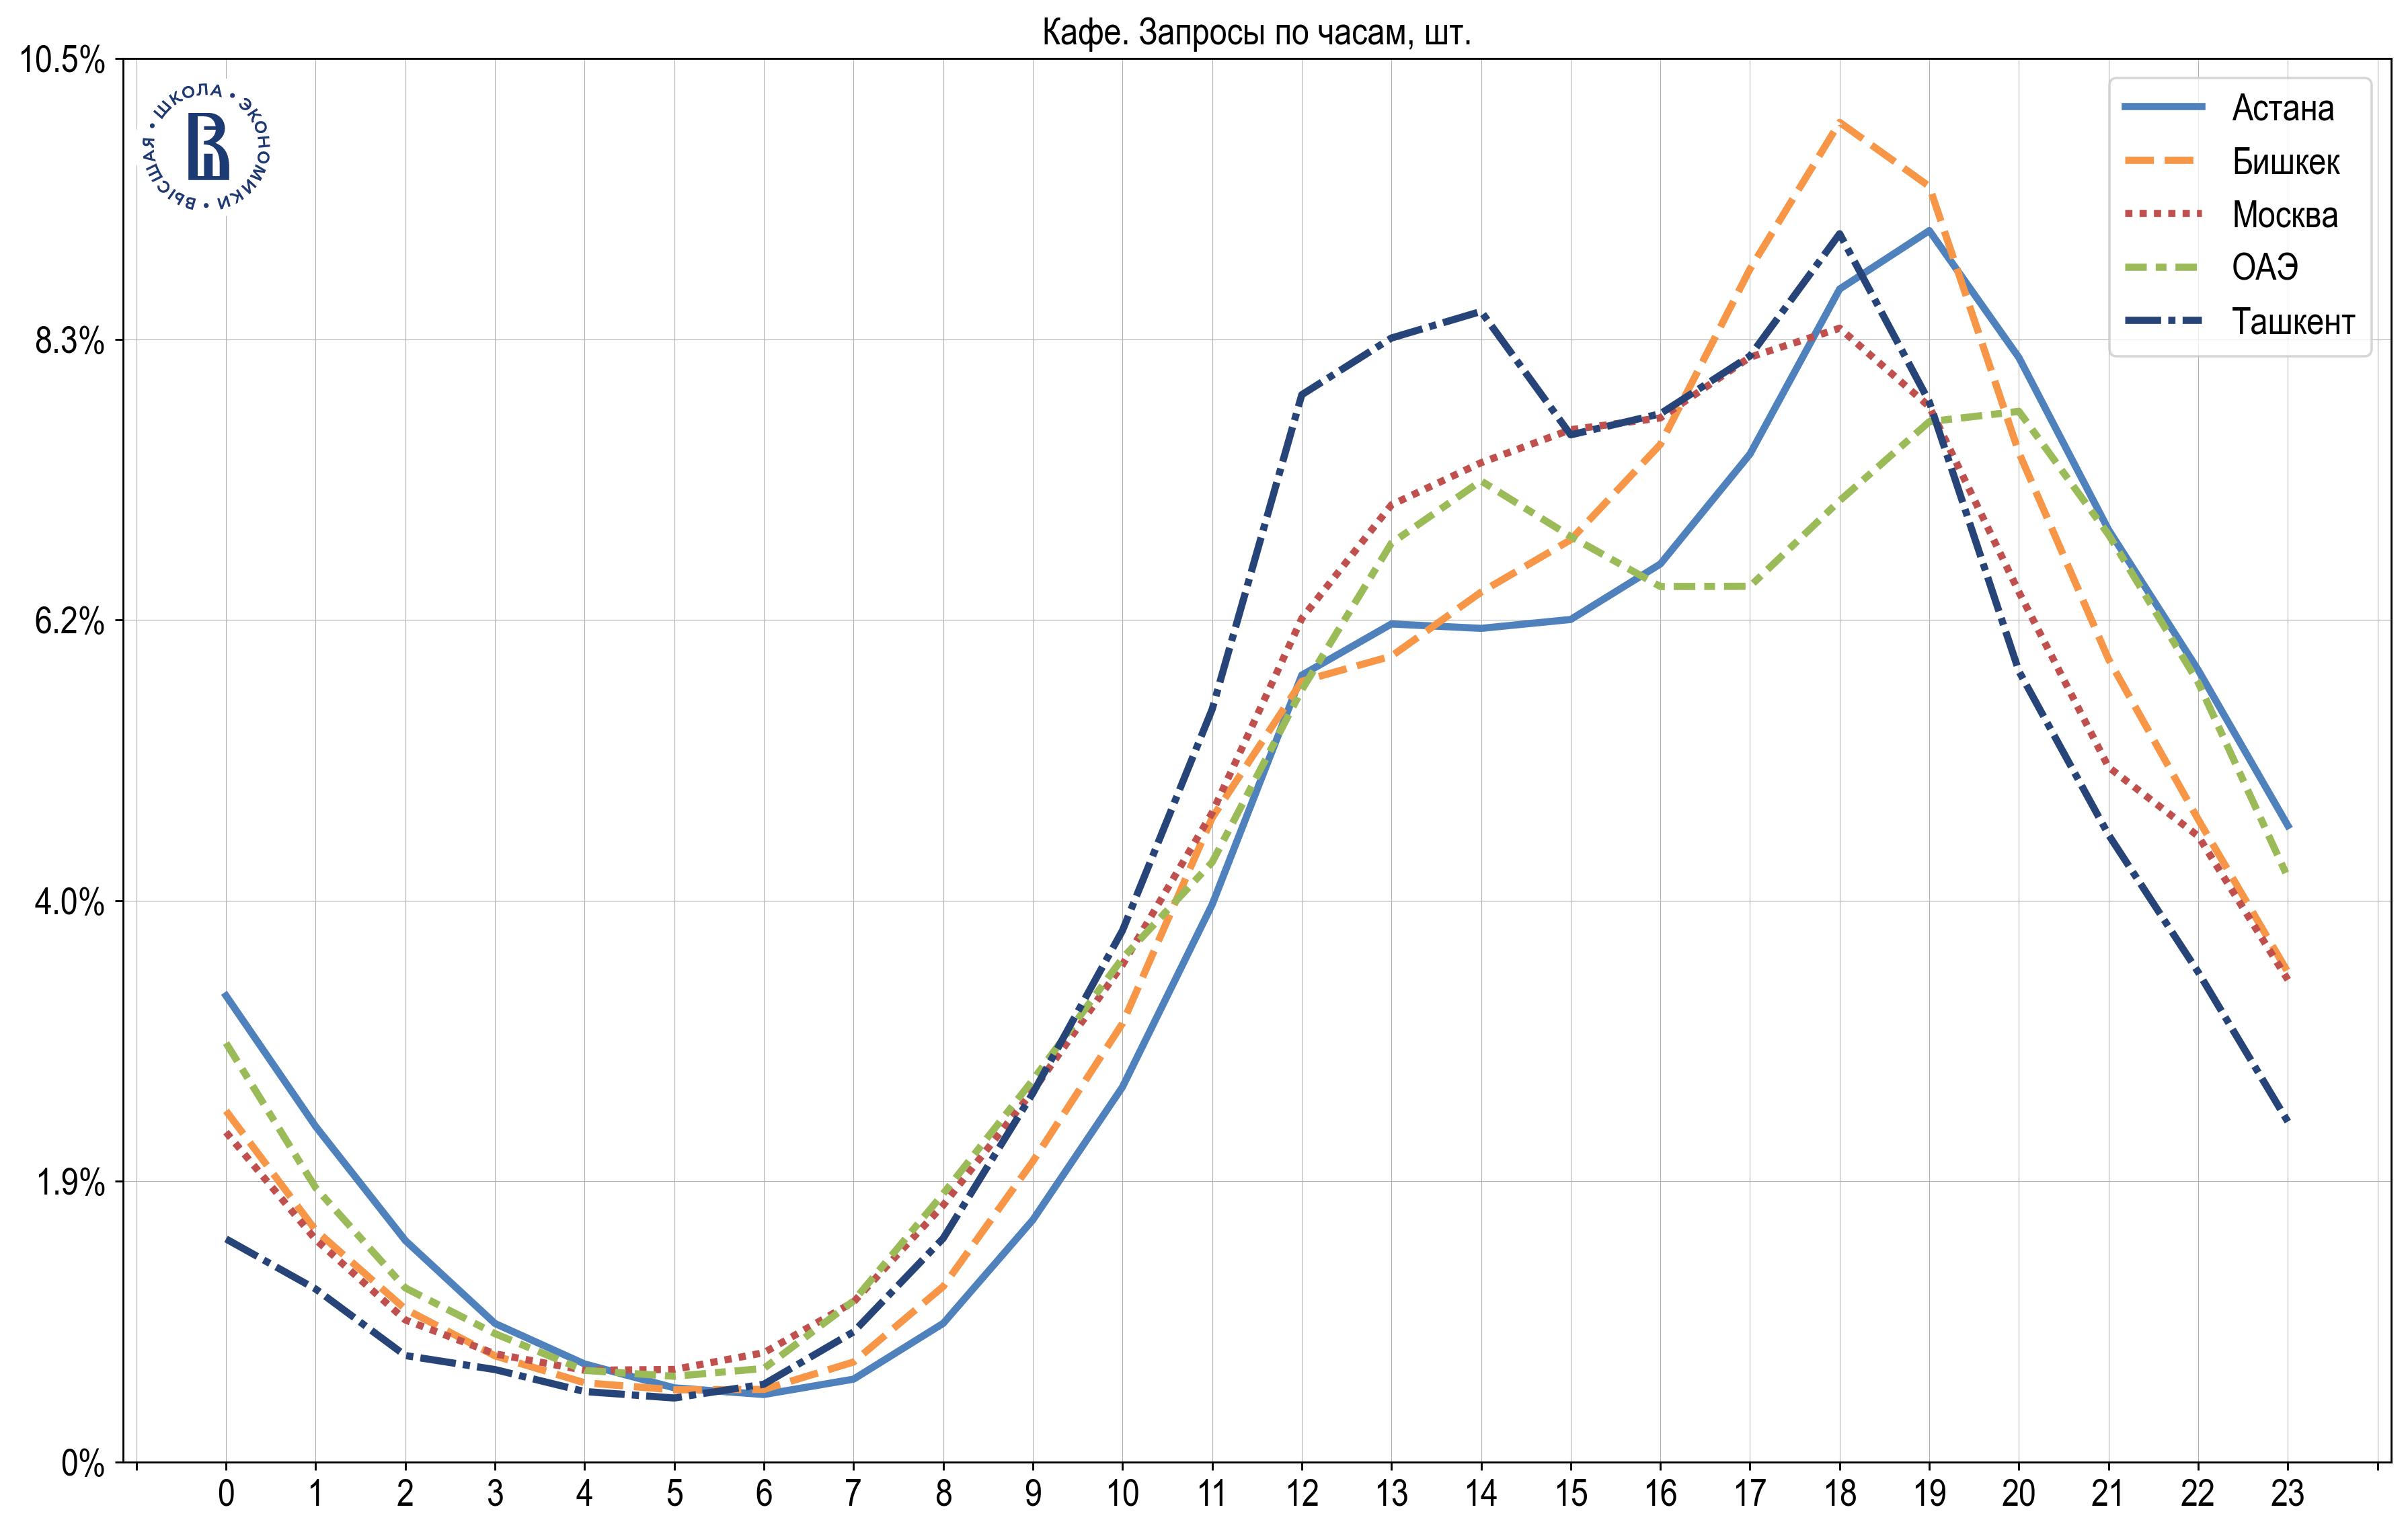

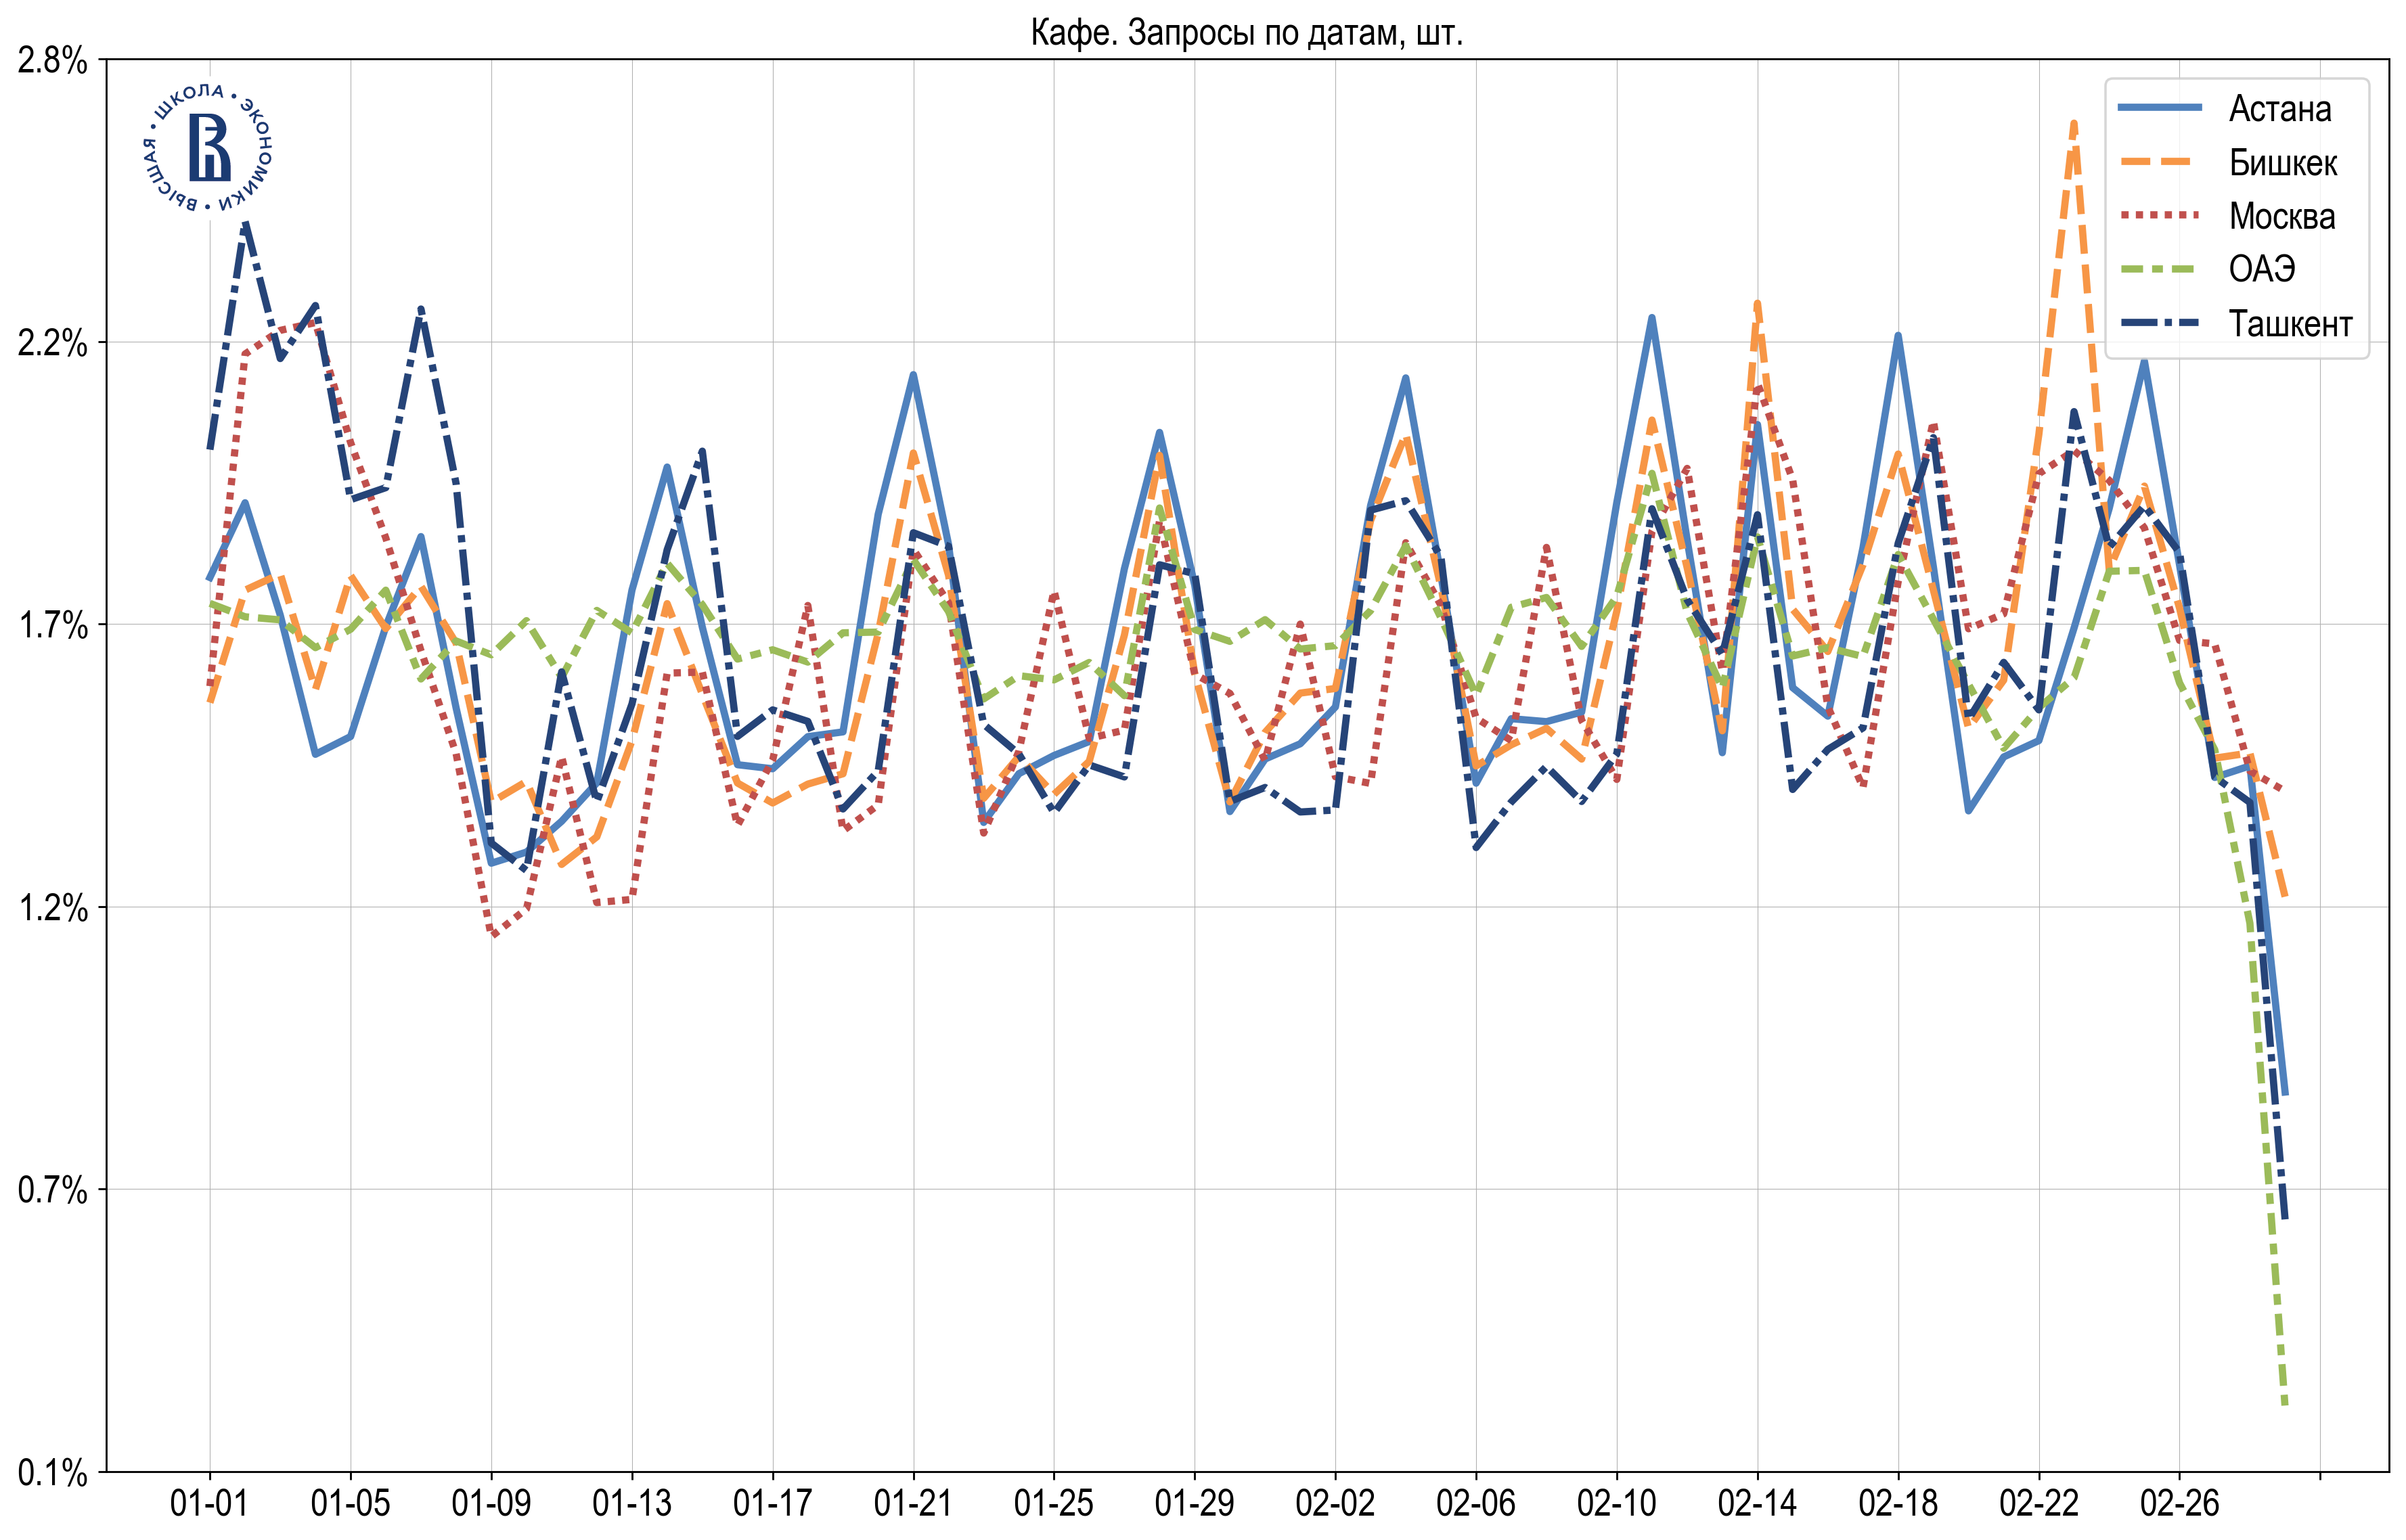

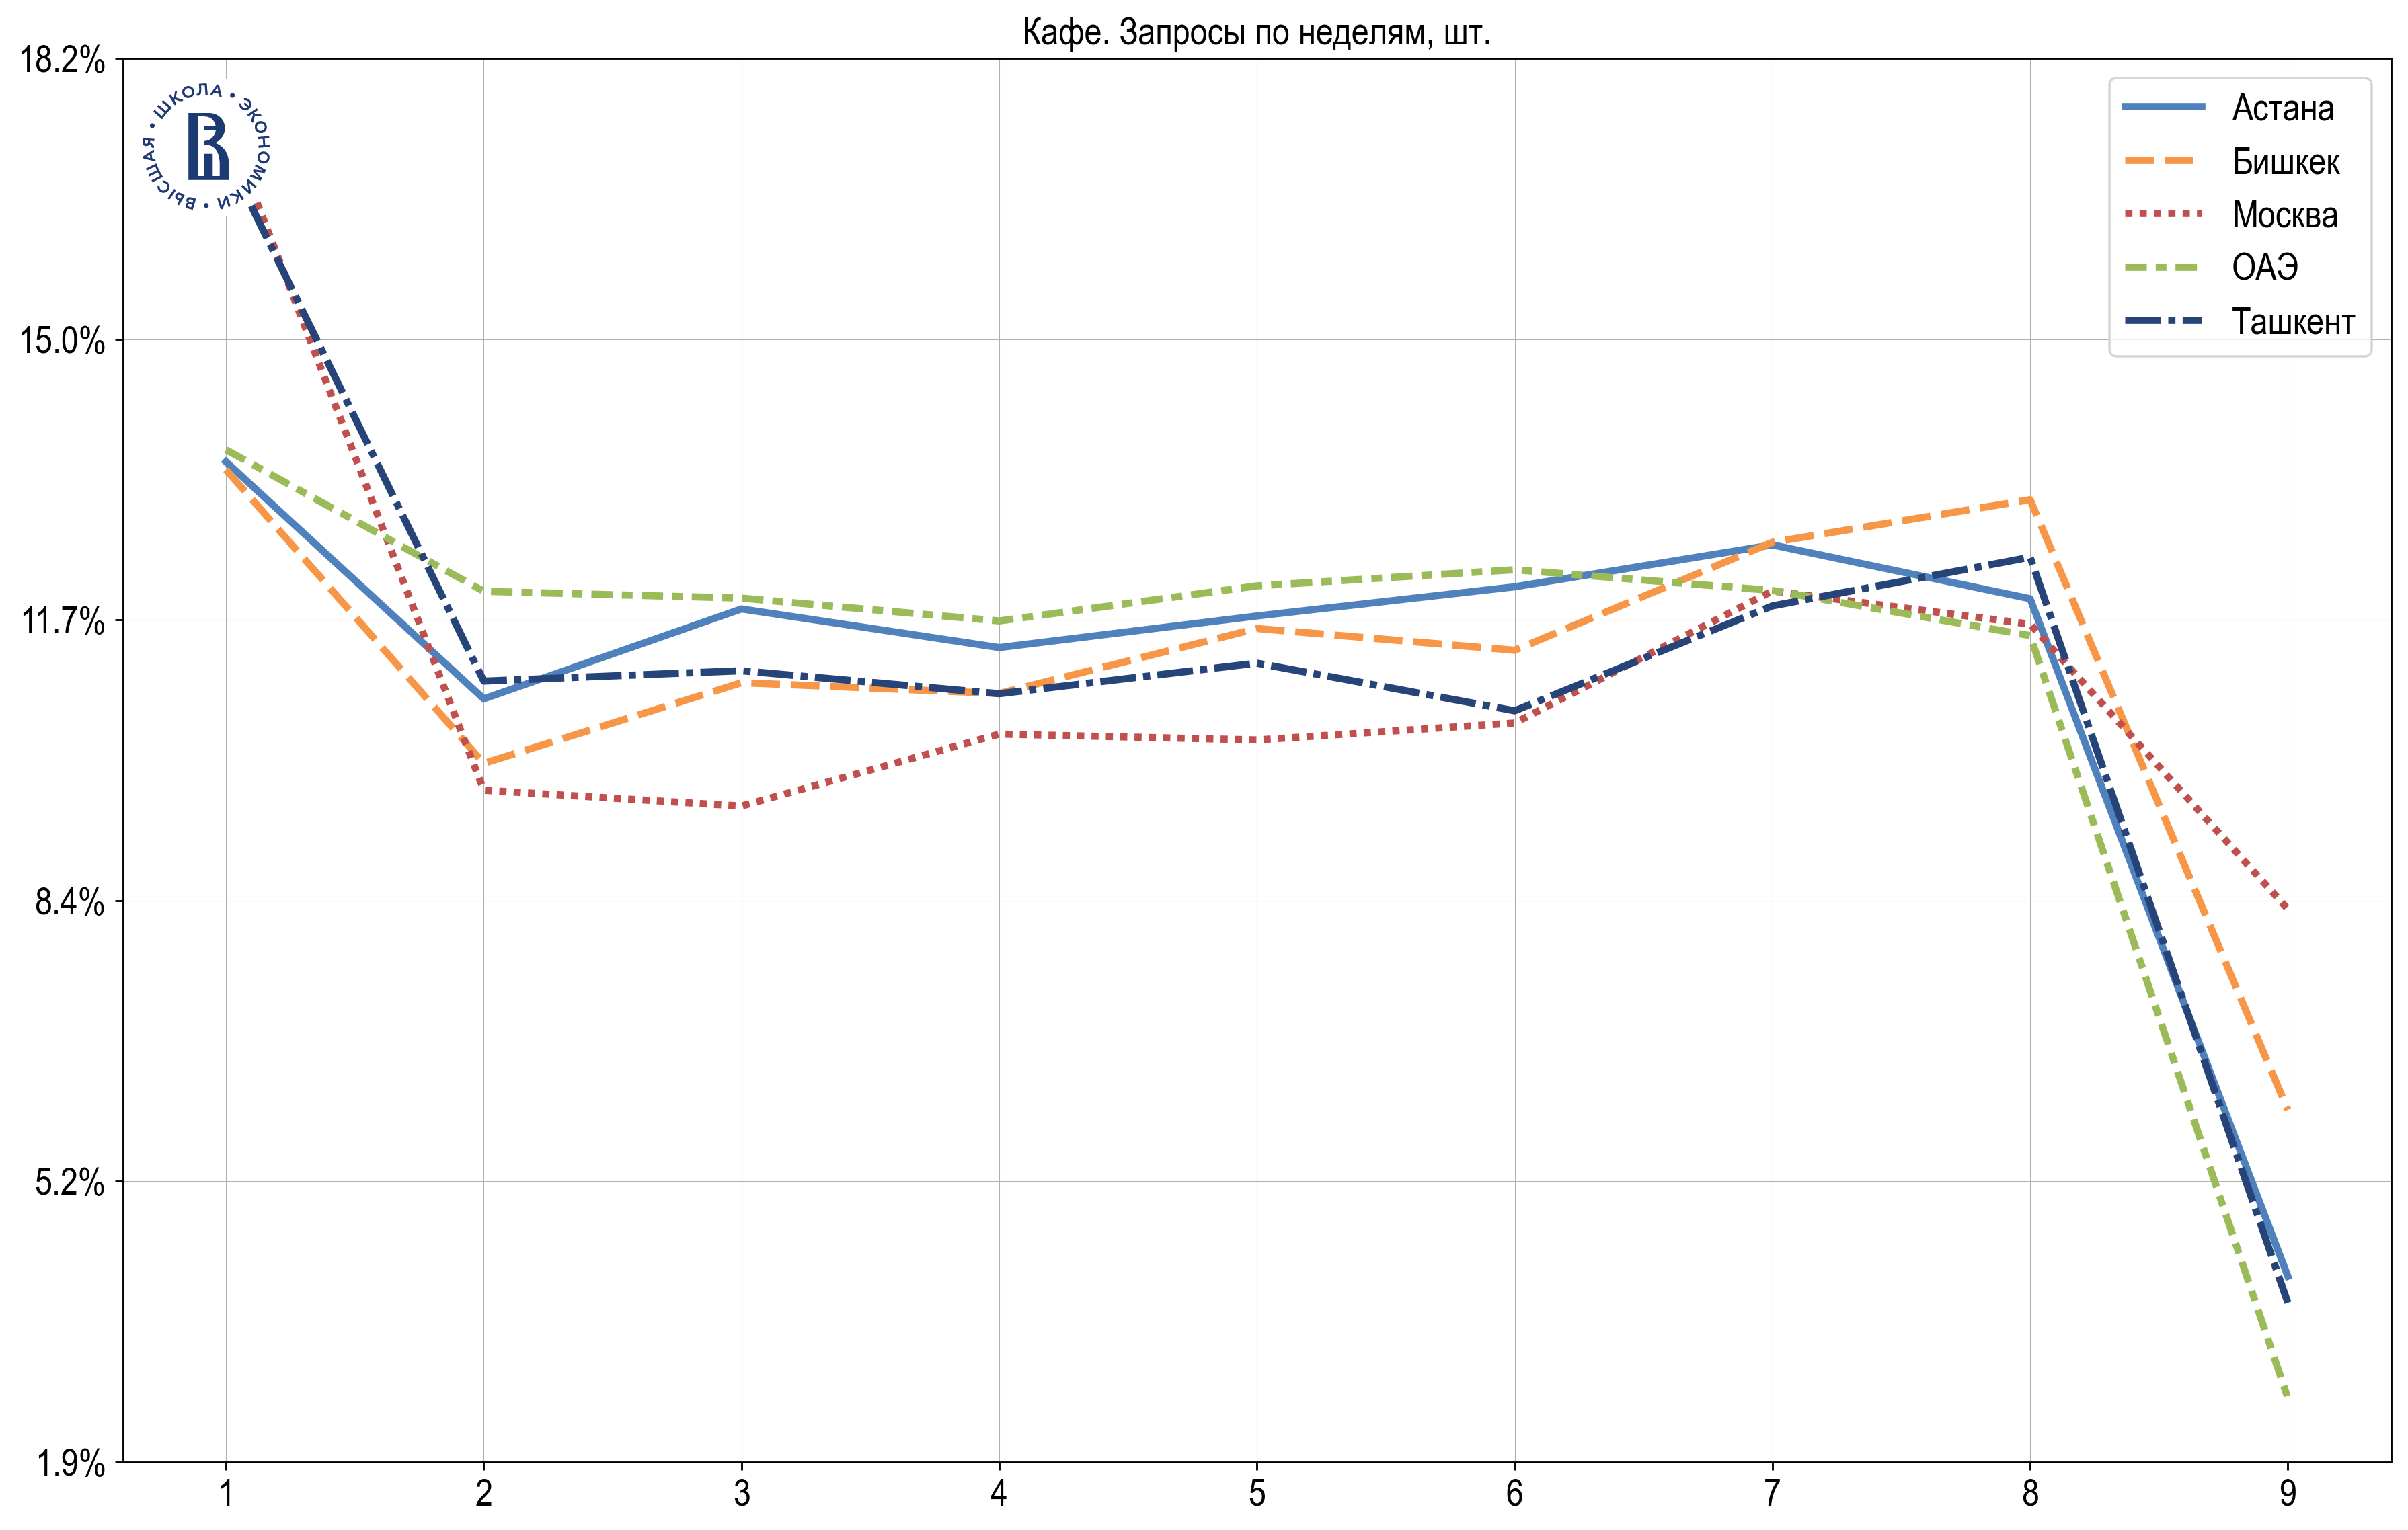

  0%|                                                                                          | 0/100 [00:03<?, ?it/s]

KeyboardInterrupt



In [39]:
make_linear_plots(f'files/df_dates.xlsx', rubrics, 100, size_x=6.3*4, size_y=3.94*4, img_w=16.5, img_h=10, blank=False, word_sample='files/report_ten_city.docx')

### Рис. 17

In [ ]:
def plot_matrix(file, city, cnt_graphics=50, cnt_shars=12, step=1, size_x=6.89*4, size_y=4.25*4, font_size=16, img_w=17.5, img_h=10.8, blank=False, word_sample='files/report.docx'):
    shar_nums = list(range(1,16))*500
    start_range = 1
    stop_range = cnt_shars*step+1
    time = str(datetime.datetime.now())[2:16].replace('-','').replace(' ','_').replace(':','')
    print(f'files/{city}/{city}_shars_{time}.docx')
    df_list = []
    
    for graphic_num in tqdm(range(cnt_graphics)):
        shar_num = shar_nums.pop()
        df = pd.read_excel(file)[['Рубрика','Запросы 2022', 'Запросы 2023', 'Запросы, итого']].iloc[range(start_range, stop_range, step)].set_index('Рубрика').fillna(0)
        start_range = stop_range
        stop_range = (graphic_num+2)*cnt_shars*step+1

        df['Запросы, итого'] = (df['Запросы, итого'] - min(df['Запросы, итого'])) / (max(df['Запросы, итого']) - min(df['Запросы, итого']))*300
        requests_total = pd.read_excel(file)['Запросы 2023'].sum()
        df['Рост/Падение, %'] = df['Запросы 2023'] / df['Запросы 2022']
        df['Доля рынка, %'] = df['Запросы 2023'] / requests_total
        x = (df['Доля рынка, %'])
        y = (df['Рост/Падение, %'])
        sizes = (df['Запросы, итого']/1000)
        x_avg = (x.min()+x.max())/2
        y_avg = (y.min()+y.max())/2
        
        xi, yi = df['Доля рынка, %'], df['Рост/Падение, %']
        df.loc[(xi > x_avg) & (yi > y_avg), 'group'] = 'Звёзды:'
        df.loc[(xi > x_avg)  & (yi <= y_avg), 'group'] = 'Коровы:'
        df.loc[(xi <= x_avg)  & (yi > y_avg), 'group'] = 'Дети:'
        df.loc[(xi <= x_avg)  & (yi <= y_avg), 'group'] = 'Собаки:'
        df = df.sort_values(['Доля рынка, %', 'Рост/Падение, %'], ascending=[False, False])
        
        n = 0.02
        m = 0.02
        ax.set_ylim(ax.get_ylim()[0] * (1 - n), ax.get_ylim()[1] * (1 + n))
        ax.set_xlim(ax.get_xlim()[0] * (1 - m), ax.get_xlim()[1] * (1 + m))
        ax.spines['top'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.set_xticklabels('')
        ax.set_yticklabels('')
        plt.tick_params(bottom = False, left=False)

        for xi, yi, rubric, size in zip(x, y, x.index, sizes):
            rs = rubric.split(' ')
            if len(rs) > 1:
                rsl = len(rs) // 2
                rubric = ' '.join(rs[:rsl] + ['\n'] + rs[rsl:])

            shar_path = [r"C:\Users\Mamed\YandexDisk\_Documents\Проекты\2ГИС 2023\Лого\Шар_{:02}.png".format(shar_num)]
            shar_img = OffsetImage(plt.imread(shar_path[0], format="png"), zoom=size)
            ab = AnnotationBbox(shar_img, (xi, yi), frameon=False)
            ax.add_artist(ab)
            plt.annotate(rubric, (xi, yi), ha='center', va='center', font=fpath, color='#404040')

        ax.hlines((y.min()+y.max())/2, x.min(), x.max(), colors='gray', linewidth=1)
        ax.vlines((x.min()+x.max())/2, y.min(), y.max(), colors='gray', linewidth=1)
        
        im = plt.imread(r"C:\Users\Mamed\YandexDisk\_Documents\Проекты\2ГИС 2023\Лого\01_Logo_HSE_full_rus_PANTONE_for_dark_2.png")
        newax = fig.add_axes([0.1, 0.8, 0.1, 0.1], zorder=1, alpha=1)
        newax.imshow(im)
        newax.axis('off')
        fig.savefig(f'pictures/{city}_shar_{shar_num}.png', bbox_inches='tight', transparent=False)
        
        txt = ''
        for cat in ['Звёзды:','Коровы:','Дети:','Собаки:']:
            txt +=  cat + ' ' + ', '.join([word[::-1].replace('/', 'и', 1)[::-1].replace('/', ',').replace(' ,', ',').lower() for word in df[df['group'] == cat].index]) + "\n"
        txt = txt[::-1].replace('\n',':', 1)[::-1]
        add_image(f'files/{city}/{city}_shars_{time}.docx', f'pictures/{city}_shar_{shar_num}.png', word=txt, img_w=img_w, img_h=img_h, blank=blank,word_sample=word_sample)
        #plt.show()
        plt.close()
        df_list.append(df)
    return pd.concat(df_list)

### Рис. 18

In [ ]:
def plot_matrix_cities(cnt_graphics=100, show=False, size_x=6.89*4, size_y=4.25*4, font_size=16, img_w=17.5, img_h=10.8, blank=False, word_sample='files/report.docx'):
    df_new = df_src[['rubricName','city']].drop_duplicates().set_index(['rubricName','city'])
    df_new['Запросы 2020'] = df_src[df_src['year_r'] == 2020].groupby(['rubricName', 'city']).sum('cnt_requests')[['cnt_requests']]
    df_new['Запросы 2021'] = df_src[df_src['year_r'] == 2021].groupby(['rubricName', 'city']).sum('cnt_requests')[['cnt_requests']]
    df_new['Запросы 2022'] = df_src[df_src['year_r'] == 2022].groupby(['rubricName', 'city']).sum('cnt_requests')[['cnt_requests']]
    df_new['Запросы 2023'] = df_src[df_src['year_r'] == 2023].groupby(['rubricName', 'city']).sum('cnt_requests')[['cnt_requests']]
    df_new['Запросы, итого'] =  df_new['Запросы 2020'] + df_new['Запросы 2021'] + df_new['Запросы 2022'] + df_new['Запросы 2023']

    rubrics = dd.read_parquet(f"files/ten_city/df_tx_grouped_filtered_ten_city")['rubricName'].unique().compute()
    rubrics = [i for i in rubrics.to_dict().values()]
    
    for rubric in tqdm(rubrics[:cnt_graphics]):
        df = df_new.loc[df_new['rubricName']==rubric]
        df['Запросы, итого'] = (df['Запросы, итого'] - min(df['Запросы, итого'])) / (max(df['Запросы, итого']) - min(df['Запросы, итого']))*300
        requests_total = df_new['Запросы 2023'].sum()
        df['Рост/Падение, %'] = df['Запросы 2023'] / df['Запросы 2022']
        df['Доля рынка, %'] = df['Запросы 2023'] / requests_total
        x = (df['Доля рынка, %'])
        y = (df['Рост/Падение, %'])
        sizes = (df['Запросы, итого']/1000)
        x_avg = (x.min()+x.max())/2
        y_avg = (y.min()+y.max())/2
        xi, yi = df['Доля рынка, %'], df['Рост/Падение, %']
        df.loc[(xi > x_avg) & (yi > y_avg), 'group'] = 'Звёзды:'
        df.loc[(xi > x_avg)  & (yi <= y_avg), 'group'] = 'Коровы:'
        df.loc[(xi <= x_avg)  & (yi > y_avg), 'group'] = 'Дети:'
        df.loc[(xi <= x_avg)  & (yi <= y_avg), 'group'] = 'Собаки:'
        df = df.sort_values(['Доля рынка, %', 'Рост/Падение, %'], ascending=[False, False])

        ax.scatter(x, y, sizes, c='#C0504D', alpha=0.7)

        for xi, yi, city, size in zip(x, y, x.index, sizes):
            rs = city.split(' ')
            if len(rs) > 1:
                rsl = len(rs) // 2
                city = ' '.join(rs[:rsl] + ['\n'] + rs[rsl:])

            shar_path = [r"Лого\Шар_{:02}.png".format(shar_num)]
            shar_img = OffsetImage(plt.imread(shar_path[0], format="png"), zoom=size)
            ab = AnnotationBbox(shar_img, (xi, yi), frameon=False)
            ax.add_artist(ab)
            plt.annotate(city, (xi, yi), ha='center', va='center', font=fpath, color='#404040')

        ax.hlines((y.min()+y.max())/2, x.min(), x.max(), colors='gray', linewidth=1)
        ax.vlines((x.min()+x.max())/2, y.min(), y.max(), colors='gray', linewidth=1)
        
        im = plt.imread(r"C:\Users\Mamed\YandexDisk\_Documents\Проекты\2ГИС 2023\Лого\01_Logo_HSE_full_rus_PANTONE_for_dark_2.png")
        newax = fig.add_axes([0.1, 0.8, 0.1, 0.1], zorder=1, alpha=0.5)
        newax.imshow(im)
        newax.axis('off')
        fig.savefig(f'pictures/{folder}_shar_{shar_num}.png', bbox_inches='tight', transparent=False)
        
        txt = f'{rubric} '
        for cat in ['Звёзды:','Коровы:','Дети:','Собаки:']:
            txt +=  cat + ' ' + ', '.join([word[::-1].replace('/', 'и', 1)[::-1].replace('/', ',').replace(' ,', ',') for word in df[df['group'] == cat].index]) + "\n"
        txt = txt[::-1].replace('\n',':', 1)[::-1]
        add_image(f'files/{folder}/{folder}_shars_{time}.docx', f'pictures/{folder}_shar_{shar_num}.png', word=txt, img_w=img_w, img_h=img_h, blank=blank,word_sample=word_sample)
        #plt.show()
        plt.close()
        df_list.append(df)
    return pd.concat(df_list)

### Рис. 19

In [52]:
def count_matrix(df):
    df['Запросы, итого'] = (df['Запросы, итого'] - min(df['Запросы, итого'])) / (max(df['Запросы, итого']) - min(df['Запросы, итого']))*300
    requests_total = df_new['Запросы 2023'].sum()
    df['Рост/Падение, %'] = df['Запросы 2023'] / df['Запросы 2022']
    df['Доля рынка, %'] = df['Запросы 2023'] / requests_total
    x = (df['Доля рынка, %'])
    y = (df['Рост/Падение, %'])
    sizes = (df['Запросы, итого']/1000)
    x_avg = (x.min()+x.max())/2
    y_avg = (y.min()+y.max())/2
    xi, yi = df['Доля рынка, %'], df['Рост/Падение, %']
    df.loc[(xi > x_avg) & (yi > y_avg), 'group'] = 'Звёзды:'
    df.loc[(xi > x_avg)  & (yi <= y_avg), 'group'] = 'Коровы:'
    df.loc[(xi <= x_avg)  & (yi > y_avg), 'group'] = 'Дети:'
    df.loc[(xi <= x_avg)  & (yi <= y_avg), 'group'] = 'Собаки:'
    df = df.sort_values(['Доля рынка, %', 'Рост/Падение, %'], ascending=[False, False])
    return df

In [54]:
df = count_matrix(data)

[########################################] | 100% Completed | 115.92 ms


In [55]:
df.iloc[:,[0,*range(3,11)]]

city_rubric  Запросы 2020  \
0               Алматы.Торгово-развлекательные центры / Моллы       1894280   
1                                            Алматы.Рестораны       1497767   
2                                      Алматы.Быстрое питание       1413635   
3                                            Алматы.Гостиницы       1091872   
4                                        Алматы.Бизнес-центры       1401014   
5                                                 Астана.Кафе        813791   
6                                               СПБ.Рестораны       1389652   
7                                            Москва.Рестораны       1599622   
8                                                 Москва.Кафе       1405875   
9                                      Москва.Быстрое питание       2024622   
10              Москва.Торгово-развлекательные центры / Моллы       1817200   
11                                       Москва.Бизнес-центры       2401635   
12                                        Алматы.Бани / Сауны        664053   
13            Алматы.Торговые центры / Универсальные магазины       1011400   
14                                        Алматы.Супермаркеты        995271   
15                                           Астана.Рестораны        846696   
16                                        Астана.Бани / Сауны        559824   
17                                Алматы.Продуктовые магазины       1244244   
18                                              Алматы.Аптеки       1131165   
19                                           Москва.Гостиницы       1244310   
20                                                   СПБ.Кафе       1223675   
21                                              ОАЭ.Гостиницы       1089450   
22                                        Москва.Супермаркеты       1710256   
23            Москва.Торговые центры / Универсальные магазины       1933042   
24                                             Алматы.Кофейни        711630   
25                                                Алматы.Бары        866662   
26                  Алматы.Многопрофильные медицинские центры        734535   
27                                           Астана.Гостиницы        713903   
28              Астана.Торгово-развлекательные центры / Моллы        719303   
29                 ОАЭ.Торгово-развлекательные центры / Моллы        445530   
30                                        СПБ.Быстрое питание       1227412   
31                                               Алматы.Банки        968407   
32                                   Новосибирск.Бани / Сауны        779998   
33                                           Новосибирск.Кафе        868360   
34                                           Алматы.Банкоматы        793273   
35                 СПБ.Торгово-развлекательные центры / Моллы       1154118   
36                                        Астана.Супермаркеты        571254   
37                                                Астана.Бары        706723   
38                                       Астана.Бизнес-центры        681151   
39                                      Алматы.Парикмахерские        745150   
40                                              Астана.Аптеки        606898   
41                                      Новосибирск.Рестораны        656166   
42                                Новосибирск.Быстрое питание        752229   
43                                                   СПБ.Бары        849481   
44                                                Москва.Бары        850759   
45             Новосибирск.Многопрофильные медицинские центры        729547   
46                                         Новосибирск.Аптеки        910924   
47                                             Москва.Кофейни        889675   
48                                               Алматы.Рынки        444677   
49                                        Алматы.Университеты        721128   
50            Астана.

### Рис. 20

In [56]:
def plot_matrix(file, city, cnt_graphics=50, cnt_shars=12, step=1, size_x=6.89*4, size_y=4.25*4, font_size=16, img_w=17.5, img_h=10.8, blank=False, word_sample='files/report.docx'):
    shar_nums = list(range(1,16))*500
    start_range = 1
    stop_range = cnt_shars*step+1
    time = str(datetime.datetime.now())[2:16].replace('-','').replace(' ','_').replace(':','')
    #+print(f'files/{city}/{city}_shars_{time}.docx')
    df_list = []
    
    for graphic_num in tqdm(range(cnt_graphics)):
        shar_num = shar_nums.pop()

        df = pd.read_excel(file)[['Рубрика','Запросы 2022', 'Запросы 2023', 'Запросы, итого']].iloc[range(start_range, stop_range, step)].set_index('Рубрика').fillna(0)
        start_range = stop_range
        stop_range = (graphic_num+2)*cnt_shars*step+1

        df['Запросы, итого'] = (df['Запросы, итого'] - min(df['Запросы, итого'])) / (max(df['Запросы, итого']) - min(df['Запросы, итого']))*300
        requests_total = pd.read_excel(file)['Запросы 2023'].sum()
        df['Рост/Падение, %'] = df['Запросы 2023'] / df['Запросы 2022']
        df['Доля рынка, %'] = df['Запросы 2023'] / requests_total
        x = (df['Доля рынка, %'])
        y = (df['Рост/Падение, %'])
        sizes = (df['Запросы, итого']/1000)
        x_avg = (x.min()+x.max())/2
        y_avg = (y.min()+y.max())/2
        xi, yi = df['Доля рынка, %'], df['Рост/Падение, %']
        df.loc[(xi > x_avg) & (yi > y_avg), 'group'] = 'Звёзды:'
        df.loc[(xi > x_avg)  & (yi <= y_avg), 'group'] = 'Коровы:'
        df.loc[(xi <= x_avg)  & (yi > y_avg), 'group'] = 'Дети:'
        df.loc[(xi <= x_avg)  & (yi <= y_avg), 'group'] = 'Собаки:'
        df = df.sort_values(['Доля рынка, %', 'Рост/Падение, %'], ascending=[False, False])

        plt.rcParams['figure.figsize'] = size_x, size_y
        plt.rcParams['figure.dpi'] = 2**8
        plt.rcParams['font.size'] = '18'
        fpath = Path(mpl.get_data_path(), r"C:\Users\Mamed\YandexDisk\_Documents\Проекты\2ГИС 2023\Лого\arialnarrow.ttf")
        fig, ax = plt.subplots()
        ax.scatter(x, y, sizes, c='#C0504D', alpha=0.7)

        n = 0.02
        m = 0.02
        ax.set_ylim(ax.get_ylim()[0] * (1 - n), ax.get_ylim()[1] * (1 + n))
        ax.set_xlim(ax.get_xlim()[0] * (1 - m), ax.get_xlim()[1] * (1 + m))
        ax.spines['top'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.set_xticklabels('')
        ax.set_yticklabels('')
        plt.tick_params(bottom = False, left=False)

        for xi, yi, rubric, size in zip(x, y, x.index, sizes):
            rs = rubric.split(' ')
            if len(rs) > 1:
                rsl = len(rs) // 2
                rubric = ' '.join(rs[:rsl] + ['\n'] + rs[rsl:])

            shar_path = [r"C:\Users\Mamed\YandexDisk\_Documents\Проекты\2ГИС 2023\Лого\Шар_{:02}.png".format(shar_num)]
            shar_img = OffsetImage(plt.imread(shar_path[0], format="png"), zoom=size)
            ab = AnnotationBbox(shar_img, (xi, yi), frameon=False)
            ax.add_artist(ab)
            plt.annotate(rubric, (xi, yi), ha='center', va='center', font=fpath, color='#404040')

        ax.hlines((y.min()+y.max())/2, x.min(), x.max(), colors='gray', linewidth=1)
        ax.vlines((x.min()+x.max())/2, y.min(), y.max(), colors='gray', linewidth=1)
        
        im = plt.imread(r"Лого\01_Logo_HSE_full_rus_PANTONE_for_dark_2.png")
        newax = fig.add_axes([0.1, 0.8, 0.1, 0.1], zorder=1, alpha=1)
        newax.imshow(im)
        newax.axis('off')
        fig.savefig(f'pictures/{city}_shar_{shar_num}.png', bbox_inches='tight', transparent=False)
        
        txt = ''
        for cat in ['Звёзды:','Коровы:','Дети:','Собаки:']:
            txt +=  cat + ' ' + ', '.join([word[::-1].replace('/', 'и', 1)[::-1].replace('/', ',').replace(' ,', ',').lower() for word in df[df['group'] == cat].index]) + "\n"
        txt = txt[::-1].replace('\n',':', 1)[::-1]
        add_image(f'files/{city}/{city}_shars_{time}.docx', f'pictures/{city}_shar_{shar_num}.png', word=txt, img_w=img_w, img_h=img_h, blank=blank,word_sample=word_sample)
        plt.show()
        plt.close()

  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

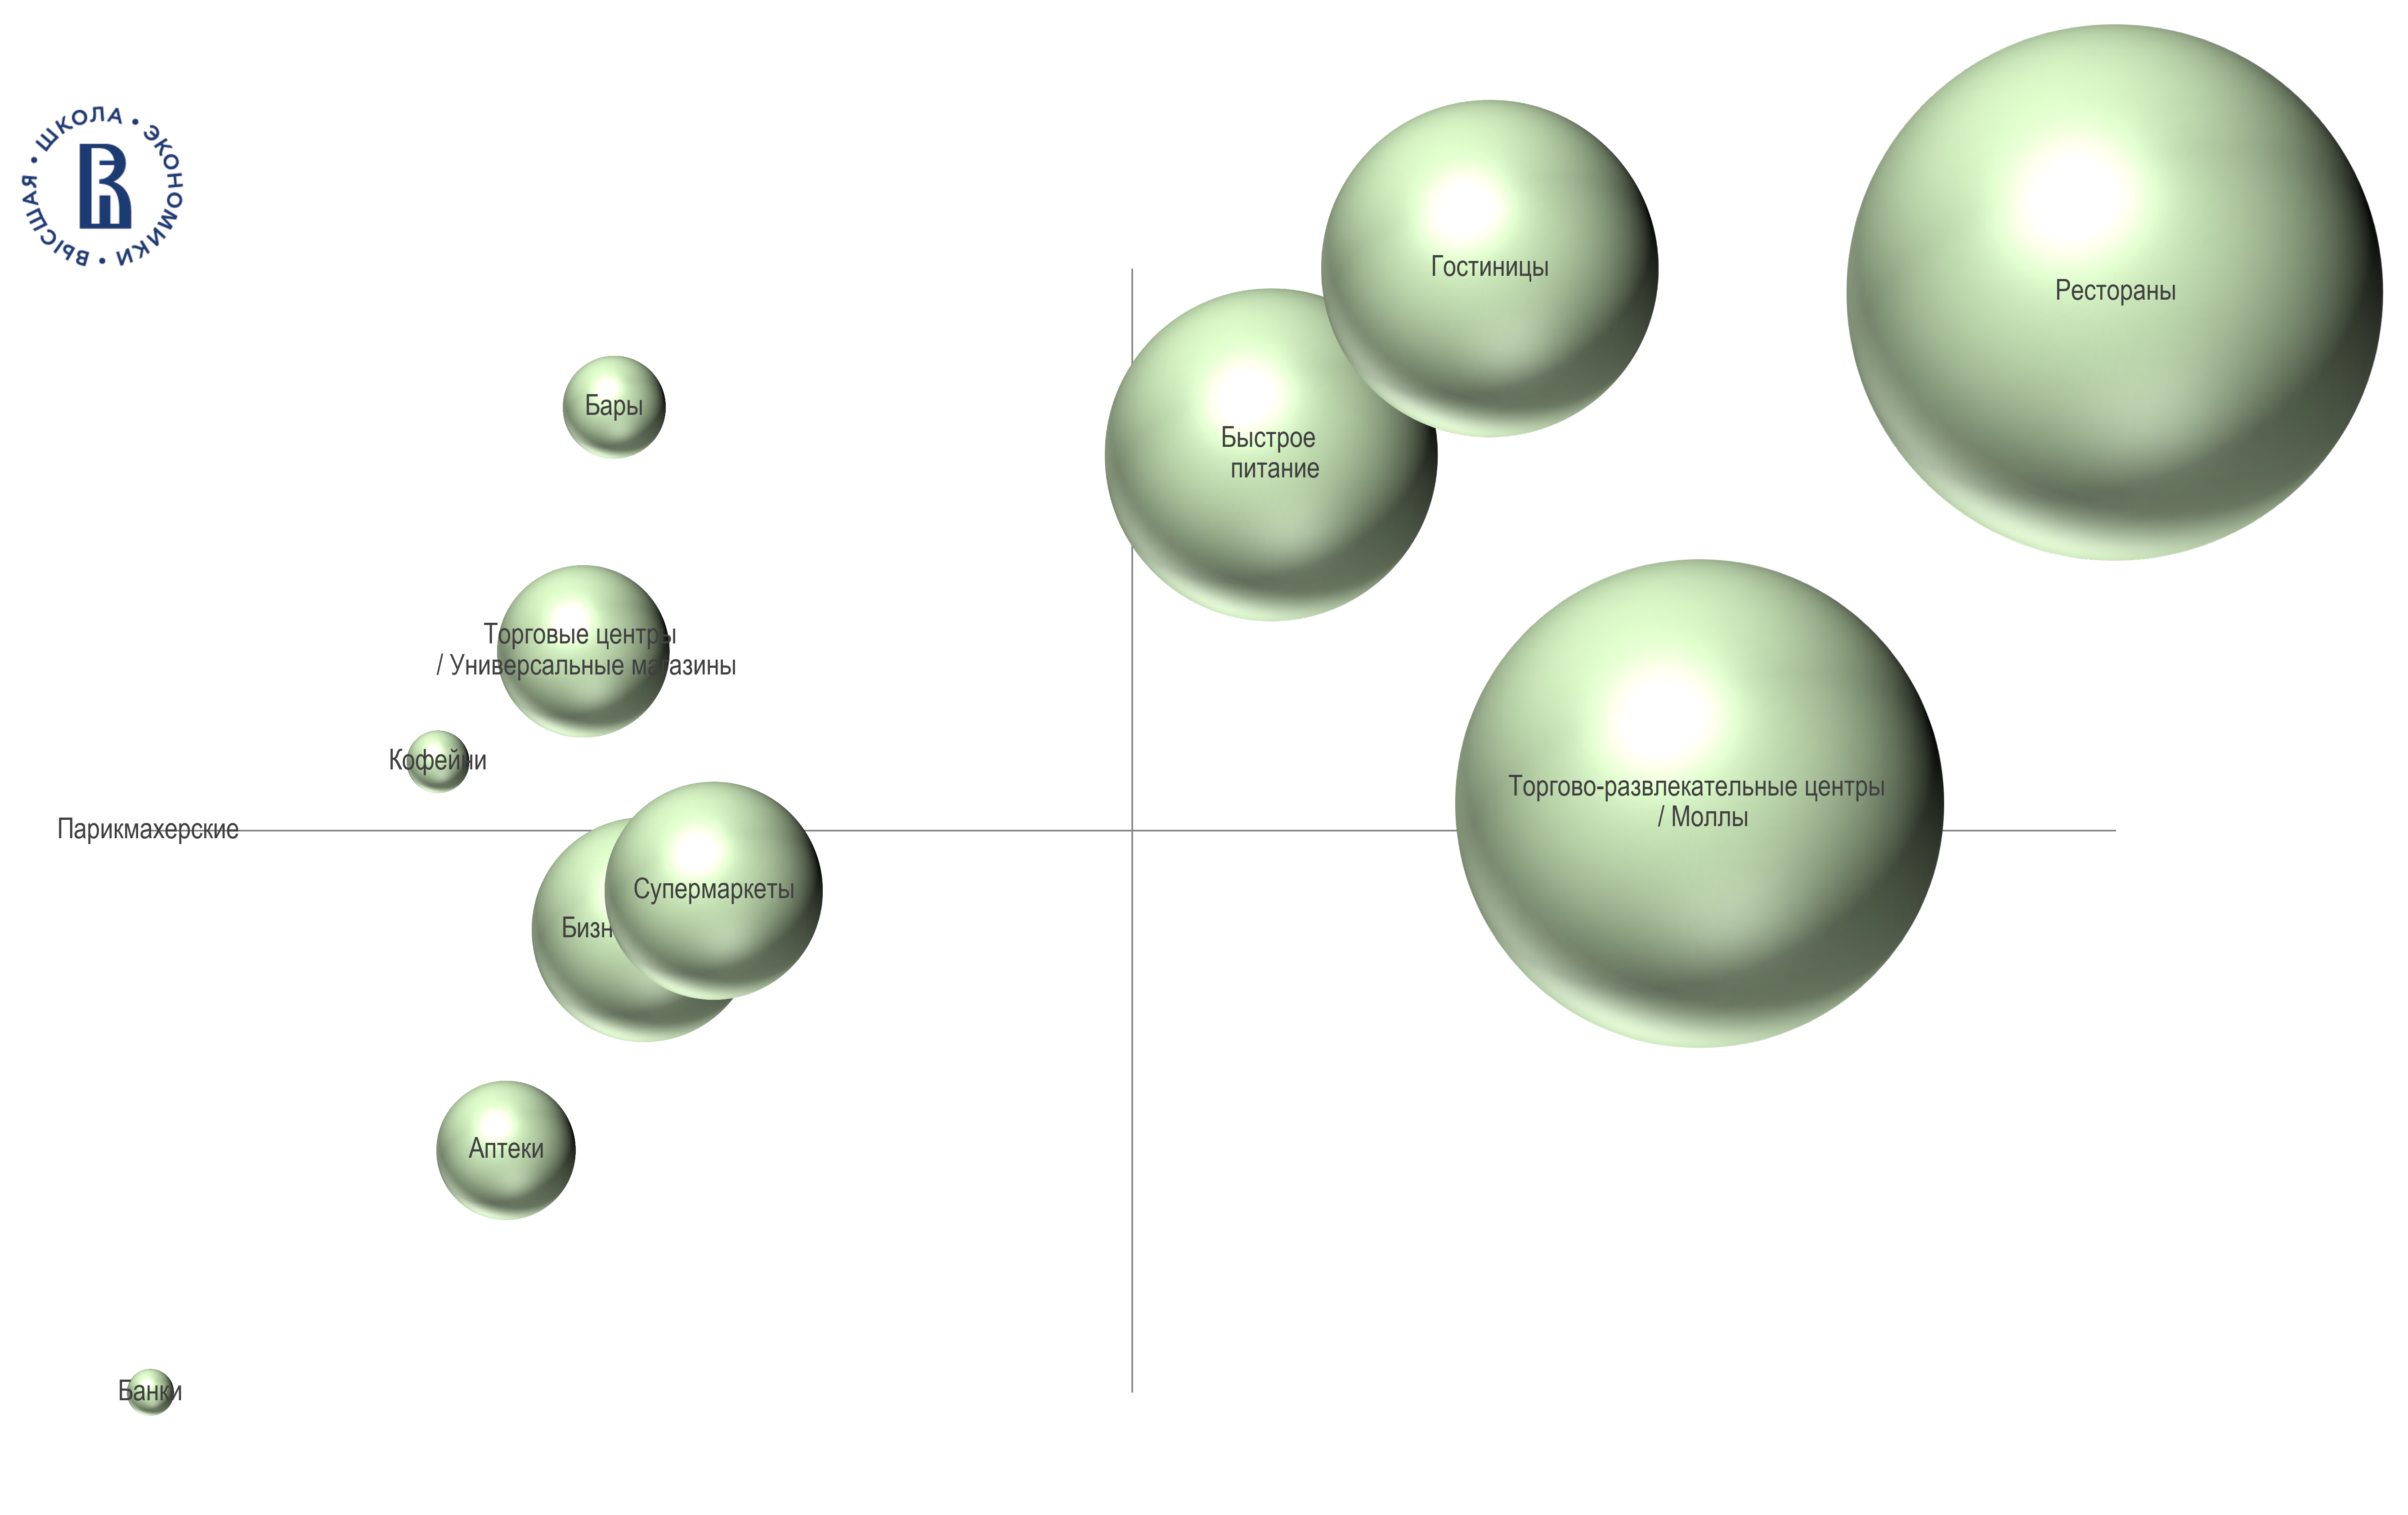

  1%|▊                                                                                 | 1/100 [00:09<15:45,  9.55s/it]

KeyboardInterrupt



Error in callback <function flush_figures at 0x0000021231872CA0> (for post_execute):



KeyboardInterrupt



In [58]:
plot_matrix(file, cnt_graphics=100, cnt_shars=12, step=1, size_x=6.3*4, size_y=3.94*4, font_size=28, img_w=16.5, img_h=10, blank=True, word_sample='files/report_ten_city.docx')